In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 다중공선성(Multicolinearity)
- 변수의 일부가 다른 독립변수의 조합으로 표현 될 수 있는 경우
- 변수들이 서로 독립이 아니라 높은 선형관계가 존재할 때 발생
- 상관분석 결과에 대해 상관계수 크기가 1에 가까운 경우 발생
- 서로 종속적인 변수로 모델을 학습시키면 과적합이 발생하여 모델 성능 저하
- 해결방법
    - VIF 기반 변수 선택법으로 의존적인 변수 삭제
    - PCA(주성분분석) 방법으로 의존적인 성분 삭제

## 1. VIF(분산팽창요인)
- 계산공식: 1/(1-R^2)
- 하나의 변수를 종속변수로 나머지 변수를 독립변수로 적용한 다항회귀분석 수행
    - 회귀계수(결정계수)를 이용하여 VIF값 도출
    - 종속변수로 사용도니 변수가 다른 변수들에게 종속적일 수록 VIF 값이 증가
    - VIF 값이 5~10 사이 일 때 다중공선성 존재
- 함수
    - statsmodels.stats.outliers_influence > variance_inflation_factor

In [2]:
df=pd.read_csv('boston_vif.csv')

In [3]:
df.head()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS,MEDV
0,1.0,-0.419782,-0.169474,0.284830,-0.191030,-1.287909,-0.144217,0.413672,-0.120013,0.409104,-0.982843,-0.666608,-1.443977,0.441052,-1.275260,0.0,24.0
1,1.0,-0.417339,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,0.194274,0.367166,0.769562,-0.867883,-0.987329,-0.230278,0.441052,-0.263711,0.0,21.6
2,1.0,-0.417342,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,1.282714,-0.265812,0.769562,-0.867883,-0.987329,-0.230278,0.396427,-1.627858,0.0,34.7
3,1.0,-0.416750,-0.169472,-0.487722,-0.368889,-1.306878,-0.835284,1.016303,-0.809889,1.139194,-0.752922,-1.106115,0.165279,0.416163,-2.153192,0.0,33.4
4,1.0,-0.412482,-0.169465,-0.487722,-0.368889,-1.306878,-0.835284,1.228577,-0.511180,1.139194,-0.752922,-1.106115,0.165279,0.441052,-1.162114,0.0,36.2


In [4]:
# X= df.drop('MEDV',axis=1)
X=df.loc[:,df.columns != 'MEDV'].copy()

In [9]:
# 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# VIF 결과 저장을 위한 데이터프레임
vif=pd.DataFrame()

In [13]:
variance_inflation_factor(X.values,15)   # 각 컬럼에 대한 vif 값

1.0616239649518593

In [12]:
X.shape

(456, 16)

In [46]:
# 데이터프레임에 컬럼명 추가
vif['features']=X.columns

In [52]:
tmp=[]
for i in range(X.shape[1]):
    tmp.append(variance_inflation_factor(X.values,i))
vif['vif']=tmp

In [53]:
# 한줄짜리 반복문
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [55]:
# 오름차순 정렬
vif.sort_values('vif')

,features,vif
15,CHAS,1.061624
13,scale(B),1.338325
0,Intercept,1.478553
12,scale(np.log(PTRATIO)),1.780320
7,scale(RM),2.596496
8,scale(AGE),3.748931
5,scale(INDUS),3.807459
14,scale(np.log(LSTAT)),4.682812
6,scale(NOX),5.071802
9,scale(np.log(DIS)),5.215025


In [61]:
# VIF 값이 5 미만인 변수 선택
cols=vif[vif['vif']<5]['features'].values

In [63]:
final_X=X[cols].copy()

In [64]:
final_X.head()

,Intercept,scale(INDUS),scale(RM),scale(AGE),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
0,1.0,-1.287909,0.413672,-0.120013,-1.443977,0.441052,-1.275260,0.0
1,1.0,-0.593381,0.194274,0.367166,-0.230278,0.441052,-0.263711,0.0
2,1.0,-0.593381,1.282714,-0.265812,-0.230278,0.396427,-1.627858,0.0
3,1.0,-1.306878,1.016303,-0.809889,0.165279,0.416163,-2.153192,0.0
4,1.0,-1.306878,1.228577,-0.511180,0.165279,0.441052,-1.162114,0.0


## 2. PCA(주성분분석)
- 고차원의 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원의 데이터를 찾아내는 방법
- 새롭게 생성된 축 사이에는 유사도가 적은 변수 및 비율로 구성
- 단위의 크기에 따라 분산 비율이 높게 계산 되기 때문에 정규화된 결과에 대해 PCA를 적용해야함
- 연속형 데이터에 대해서만 적용이 가능하므로 범주형 데이터를 제외하거나 인코딩을 통한 변환 필요
- 개념
    - 주성분 벡터
        - 전체 데이터의 분산에 대해 설명할 수 있는 새로운 축
        - 하나의 축에 대해 각 변수가 가지고 있는 가중치 값으로 기여도를 파악할 수 있음
        - 값에 대한 해석 : 0 (아무관련없음), 양수/음수 (벡터에서의 방향) , 값의크기(기여도)
    - 설명 분산
- 함수
    - sklearn.decomposition > PCA
        - PCA(n_comonents=n) : 주성분 개수
        - fit(): 주성분 계수 추정
        - transform(): 주성분 변환 값 반환
        - fit_transform(): 주성분 계수 추정 및 변환 값 반환

In [2]:
# PCA는 분산의 패턴을 찾는것
from sklearn.decomposition import PCA

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# X,y 분리
X=iris.drop('species',axis=1)
X.shape

(150, 4)

In [5]:
# 주성분 개수를 1개로 지정하여 적용
# 입력변수의 차원을 4개에서 1개로 축소
# 사용순서:  PCA 객체 생성(개수지정) => fit/transform
pca1=PCA(n_components=1)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# fitted_pca_obj.components_ => 주성분 계수
# 주성분 1개 => 하나의 축만 생성
# 행(축/차인/새로운주성분) / 열(입력변수)
# 입력변수 4개가 새로운 축(차원)에서 가지고 있는 분산에 기여하는 정도/ 방향
pca1.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

In [7]:
# fitted_pca_obj.explained_variance_ => 새로운 축이 전체 분산에서 차지하는 값
pca1.explained_variance_

array([4.22824171])

In [8]:
# fitted_pca_obj.explained_variance_ratio_
pca1.explained_variance_ratio_

array([0.92461872])

In [9]:
pca1_X=pca1.transform(X)

In [79]:
X.shape

(150, 4)

In [78]:
pca1_X.shape

(150, 1)

In [81]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
# 주성분개수 2개로 적용
pca2=PCA(n_components=2)

In [85]:
pca2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
# 주성분 벡터
# 행(주성분,축), 열(입력변수)
pca2.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [88]:
# 설명분산 확인
pca2.explained_variance_

array([4.22824171, 0.24267075])

In [89]:
pca2.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [90]:
# transform 결과 확인
pca2_X= pca2.transform(X)

In [92]:
# 주성분 개수를 지정하지 않고 적용
# PCA(n_components=None(defalut))
pca3=PCA()

In [97]:
pca3.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
pca3.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [103]:
pca3_X=pca3.transform(X)

In [127]:
# 누적기여율 연산
# np.cumsum()
pca3_cumsum=pd.Series(pca3.explained_variance_ratio_.cumsum())

In [133]:
pca3_cumsum.index=['PC1','PC2','PC3','PC4']

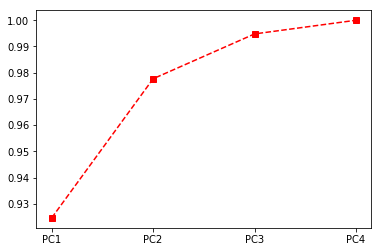

In [134]:
# 누적기여율 시각화
plt.plot(pca3_cumsum,'rs--')

In [135]:
# 누적기여율이 97% 이상이 되는 차원 개수
pca3_cumsum[pca3_cumsum>=0.97]

PC2    0.977685
PC3    0.994788
PC4    1.000000
dtype: float64

In [138]:
result=PCA(n_components=2).fit_transform(X)

### X 데이터에 대해 스케일링 적용한 버전

In [154]:
# StandardScaler 객체 생성 => scale()
from sklearn.preprocessing import StandardScaler

In [155]:
scaler=StandardScaler()

In [157]:
scaled_X=scaler.fit_transform(X)

In [159]:
# 주성분 개수를 지정하지않고 적용
pca=PCA()
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [161]:
# 누적 기여율 계산 및 시각화
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

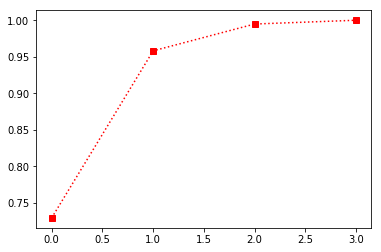

In [165]:
plt.plot(pca.explained_variance_ratio_.cumsum(),'rs:')

In [166]:
# 해석
# 누적기여율은 달라지지 않는다